In [132]:
import pandas as pd
from sklearn.utils import resample
import seaborn as sns

In [133]:
df = pd.read_csv('bmi_filled.csv')

In [134]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
0,9046,0,67.0,0,1,1,0,0,228.69,36.600000,1
1,51676,1,61.0,0,0,1,1,1,202.21,29.841007,1
2,31112,0,80.0,0,1,1,0,1,105.92,32.500000,1
3,60182,1,49.0,0,0,1,0,0,171.23,34.400000,1
4,1665,1,79.0,1,0,1,1,1,174.12,24.000000,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,1,80.0,1,0,1,0,0,83.75,28.521553,0
5106,44873,1,81.0,0,0,1,1,0,125.20,40.000000,0
5107,19723,1,35.0,0,0,1,1,1,82.99,30.600000,0
5108,37544,0,51.0,0,0,1,0,1,166.29,25.600000,0


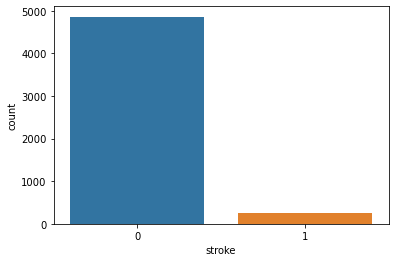

In [135]:
fig = sns.countplot(x = df.stroke)
fig.get_figure().savefig('Imbalanced.jpg')

In [136]:
df_nostroke = df[df.stroke == 0]
df_stroke = df[df.stroke == 1]
print(f'Only {len(df_stroke)/len(df_nostroke)*100}% of people have stroke')

Only 5.122402797778235% of people have stroke


In [137]:
df_stroke_upsampled = resample(df_stroke, replace=True, n_samples = len(df_nostroke))
len(df_stroke_upsampled)

4861

In [138]:
df = pd.concat((df_stroke_upsampled, df_nostroke), axis=0)

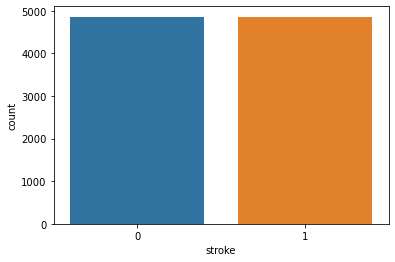

In [139]:
fig = sns.countplot(x = df.stroke)
fig.get_figure().savefig('balanced.jpg')

In [140]:
df.to_csv('balanced_dataset.csv', index=False)